In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ferra\OneDrive\Documentos\Ubiqum\The Credit One Project\credit_one.csv")
df = df.drop('ID', axis=1) # Treiem columna ID
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) # Substituïr PAY_0 per PAY_1 per mantenir una cronología
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['PAY_AGRUPAT'] = df[cols].mean(axis=1)
df.drop(cols, axis=1, inplace=True) # per eliminar els PAY_* del df
cols1 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['BILL_AMT_AGRUPAT'] = df[cols1].mean(axis=1)
df.drop(cols1, axis=1, inplace=True)
cols2 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df['PAY_AMT_AGRUPAT'] = df[cols2].mean(axis=1)
df.drop(cols2, axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT
0,20000,2,2,1,24,1,-0.333333,1284.000000,114.833333
1,120000,2,2,2,26,1,0.500000,2846.166667,833.333333
2,90000,2,2,2,34,0,0.000000,16942.166667,1836.333333
3,50000,2,2,1,37,0,0.000000,38555.666667,1398.000000
4,50000,1,2,1,57,0,-0.333333,18223.166667,9841.500000


In [4]:
# OHE SEX

In [5]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

etiquetes = {1: 'male', 2: 'female'}
df['SEX'] = df['SEX'].map(etiquetes)
encoder = OneHotEncoder(sparse_output=False)
dades_codificades = encoder.fit_transform(df[['SEX']])
df_codificat = pd.DataFrame(dades_codificades, columns=encoder.get_feature_names_out(['SEX']), index=df.index)
df_restant = df.drop(columns=['SEX'])
df_final = pd.concat([df_restant, df_codificat], axis=1)
df_final.head()

In [7]:
# Optimitzat IA
etiquetes = {1: 'male', 2: 'female'}
df['SEX'] = df['SEX'].map(etiquetes)
encoder = OneHotEncoder(sparse_output=False)
df_codificat = pd.DataFrame(encoder.fit_transform(df[['SEX']]), columns=encoder.get_feature_names_out(['SEX']), index=df.index)
df_final = df.drop(columns=['SEX']).join(df_codificat)
df_final.head()
df = df_final
df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male
0,20000,2,1,24,1,-0.333333,1284.000000,114.833333,1.0,0.0
1,120000,2,2,26,1,0.500000,2846.166667,833.333333,1.0,0.0
2,90000,2,2,34,0,0.000000,16942.166667,1836.333333,1.0,0.0
3,50000,2,1,37,0,0.000000,38555.666667,1398.000000,1.0,0.0
4,50000,2,1,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0


In [8]:
# OHE EDUCATION

In [9]:
map = {1: 'postgrau',2: 'universitari',3: 'secundaria',4: 'altres'}
df['EDUCATION'] = df['EDUCATION'].map(map)
df['EDUCATION'] = df['EDUCATION'].fillna('altres') # Gestió de valors no mapejats (ex: 0, 5, 6): els assignem a 'altres'
columna_a_codificar = df[['EDUCATION']]
df_restant = df.drop(columns=['EDUCATION'])
encoder = OneHotEncoder(sparse_output=False, drop='first')
dades_codificades = encoder.fit_transform(columna_a_codificar)
df_codificat = pd.DataFrame(dades_codificades, columns=encoder.get_feature_names_out(['EDUCATION']))
# Unim les dades restants amb les noves columnes codificades
df_final = pd.concat([df_restant, df_codificat], axis=1)
# Creem un DataFrame amb totes les columnes menys 'EDUCATION'
df_restant = df.drop(columns=['EDUCATION'])
# Unim els dos DataFrames, un al costat de l'altre
df_final = pd.concat([df_restant, df_codificat], axis=1)
# 3. MOSTRAR RESULTAT
print("DataFrame Final amb la columna 'EDUCATION' codificada:")
df = df_final
df.head()

DataFrame Final amb la columna 'EDUCATION' codificada:


,LIMIT_BAL,MARRIAGE,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari
0,20000,1,24,1,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0
1,120000,2,26,1,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0
2,90000,2,34,0,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0
3,50000,1,37,0,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0
4,50000,1,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0


In [10]:
# OHE MARRIAGE

In [11]:
labels = {1: 'casat',2: 'solter',3: 'altres'}
df['MARRIAGE'] = df['MARRIAGE'].map(labels)
encoder = OneHotEncoder(sparse_output=False)
df_codificat = pd.DataFrame(encoder.fit_transform(df[['MARRIAGE']]), columns=encoder.get_feature_names_out(['MARRIAGE']), index=df.index)
df_final = df.drop(columns=['MARRIAGE']).join(df_codificat)
df_final
df = df_final
df.head()

,LIMIT_BAL,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari,MARRIAGE_altres,MARRIAGE_casat,MARRIAGE_solter,MARRIAGE_nan
0,20000,24,1,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,120000,26,1,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,90000,34,0,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50000,37,0,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,50000,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.head()

,LIMIT_BAL,AGE,default,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari,MARRIAGE_altres,MARRIAGE_casat,MARRIAGE_solter,MARRIAGE_nan
0,20000,24,1,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,120000,26,1,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,90000,34,0,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50000,37,0,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,50000,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [25]:
y = df['default']

In [27]:
X = df.drop(columns=['default'])

In [29]:
X.head()

,LIMIT_BAL,AGE,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari,MARRIAGE_altres,MARRIAGE_casat,MARRIAGE_solter,MARRIAGE_nan
0,20000,24,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,120000,26,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,90000,34,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50000,37,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,50000,57,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
algo = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      4673
           1       0.55      0.32      0.40      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.62      0.64      6000
weighted avg       0.76      0.79      0.77      6000



In [33]:
model.feature_importances_

array([6.22523187e-02, 6.58104892e-02, 5.93504137e-01, 1.10924152e-01,
       1.37825549e-01, 4.51069113e-03, 4.15763695e-04, 6.32923834e-03,
       3.69359874e-03, 5.02357309e-03, 2.84414088e-04, 5.53603554e-03,
       3.89003986e-03, 0.00000000e+00])

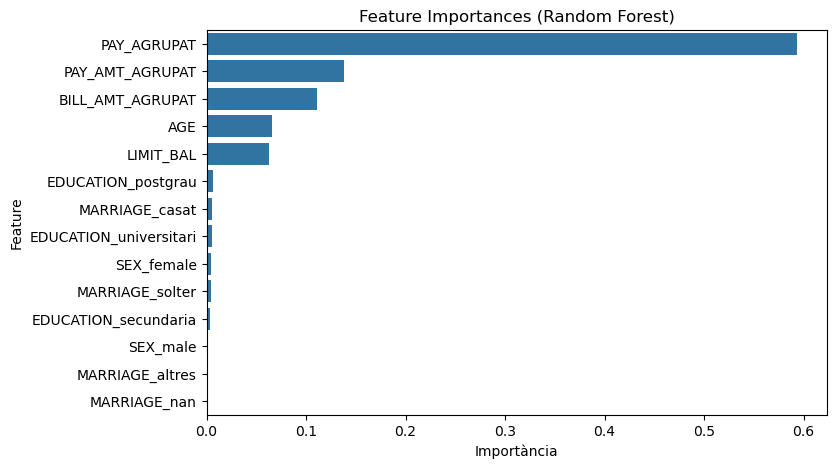

In [39]:
# Representació gràfica
# Obtenir importància de les variables
importances = model.feature_importances_
features = X.columns
# 4. Crear DataFrame ordenat
df_importances = pd.DataFrame({
    "Feature": features,
    "Importància": importances
}).sort_values("Importància", ascending=False)
# 5. Representació gràfica
plt.figure(figsize=(8,5))
sns.barplot(x="Importància", y="Feature", data=df_importances)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [45]:
# PAY_AGRUPAT ES LA MILLOR FEATURE !